<a href="https://colab.research.google.com/github/LeaCarop/Conv_Net/blob/main/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perros vs Gatos: Clasificación de imágenes.

["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) disponible en Kaggle.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-03-15 10:39:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 142.251.16.128, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   131MB/s    in 0.5s    

2022-03-15 10:39:47 (131 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Imágenes para train de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Imágenes para train de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Imágenes para test de gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Imágenes para test de perros
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
# cómo se ven los nombres de las imágenes
train_cat_fnames = os.listdir(train_cats_dir) 
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.178.jpg', 'cat.856.jpg', 'cat.622.jpg', 'cat.137.jpg', 'cat.371.jpg', 'cat.40.jpg', 'cat.882.jpg', 'cat.561.jpg', 'cat.79.jpg', 'cat.356.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
# total de imágenes
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


**Visualización de las imágenes**

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# configuración 4x4
nrows = 4
ncols = 4

pic_index = 0

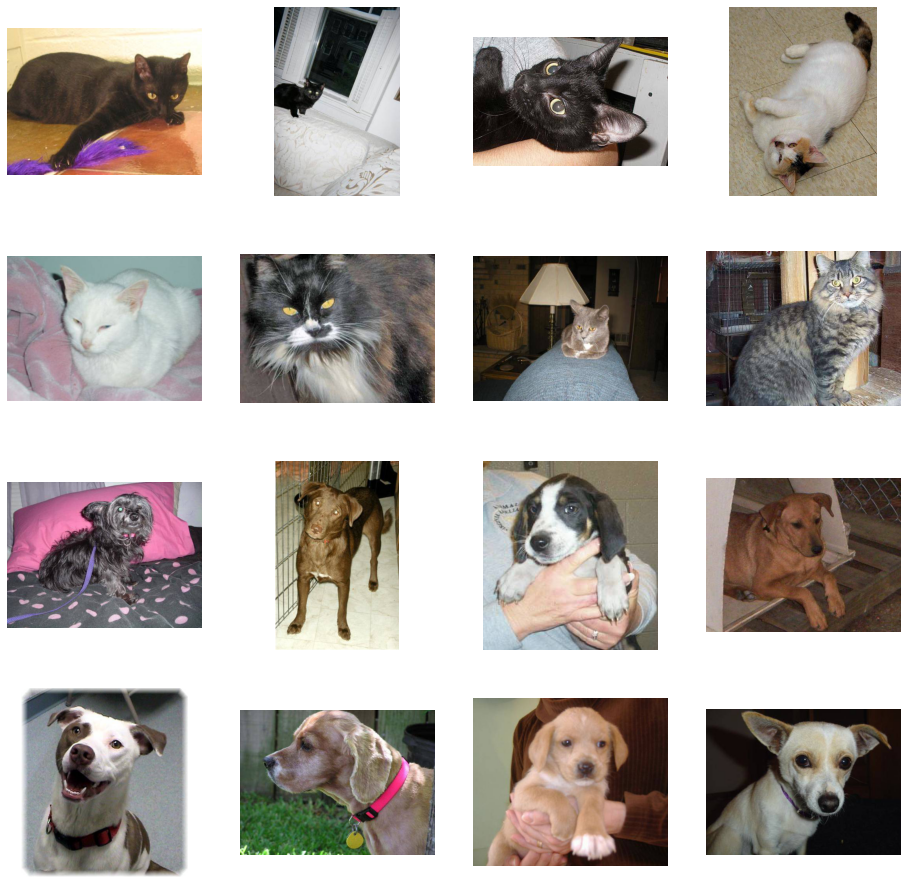

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Construir modelo de red neuronal convolucional**

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [10]:
# Nuestro mapa de características de entrada es 150x150x3: 150x150 para los píxeles de la imagen y 3 para
# los tres canales de color: R, G y B
img_input = layers.Input(shape=(150, 150, 3)) 

# La primera convolución extrae 16 filtros que son 3x3
# La convolución es seguida por una capa de agrupación máxima con una ventana de 2x2
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# La segunda convolución extrae 32 filtros que son 3x3
# La convolución es seguida por una capa de agrupación máxima con una ventana de 2x2
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# La tercera convolución extrae 64 filtros que son 3x3
# La convolución es seguida por una capa de agrupación máxima con una ventana de 2x2
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Debido a que nos enfrentamos a un problema de clasificación de dos clases, es decir, un problema de clasificación binaria, 
# terminaremos nuestra red con una activación sigmoide, de modo que la salida de nuestra red será un solo escalar entre 0 y 1, 
# codificando la probabilidad de que la imagen es de clase 1 (a diferencia de la clase 0).

# Aplanar el mapa de características a un tensor de 1 dimensión para que podamos agregar capas completamente conectadas
x = layers.Flatten()(x)

# Crear una capa completamente conectada con la activación ReLU y 512 unidades ocultas
x = layers.Dense(512, activation='relu')(x)

# Crear una capa de salida con 1 noda y activación sigmoide 
output = layers.Dense(1, activation='sigmoid')(x)

# Crear modelo:
# input = mapa de características de entrada
# output = mapa de características de entrada + capas apiladas de convolution/maxpooling  + capa completamente conectada
#          + capa de salida sigmoide
model = Model(img_input, output)

In [11]:
model.summary()  # mapa de todo lo que hemos definido en las líneas de código anterior

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496 

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### **Preprocesamiento de datos**

Configuro generadores de datos que leerán imágenes en las carpetas de origen, las convertirán en tensores float32 y las alimentarán (con sus etiquetas) a la red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Los generadores producirán lotes de 20 imágenes de tamaño 150x150 y sus etiquetas (binario).

Los datos que se ingresan a las redes neuronales generalmente deben normalizarse de alguna manera para que sean más fáciles de procesar por la red. (Es poco común alimentar píxeles sin procesar en una red convolucional). En este caso, preproceso las imágenes normalizando los valores de píxeles para que estén en el rango [0, 1] (originalmente todos los valores están en el rango [0, 255] ).

En Keras, esto se puede hacer a través de la clase keras.preprocessing.image.ImageDataGenerator usando el parámetro rescale. Esta clase ImageDataGenerator le permite instanciar generadores de lotes de imágenes aumentadas (y sus etiquetas) a través de .flow(datos, etiquetas) o .flow_from_directory(directorio). Luego, estos generadores se pueden usar con los métodos del modelo Keras que aceptan generadores de datos como entradas: fit_generator, Evaluation_generator y predict_gener

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imágenes son rescaladas por 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Imágenes de entrenamiento de flujo en lotes de 20 usando el generador train_datagen
train_generator = train_datagen.flow_from_directory(
        train_dir,  # directorio fuente para imágenes de entrenamiento
        target_size=(150, 150),  # Todas las imágenes serán redimensionadas a 150x150
        batch_size=20,
        # Dado que usamos la pérdida de entropía cruzada binaria, necesitamos etiquetas binarias
        class_mode='binary')

# Imágenes de validación de flujo en lotes de 20 usando el generador train_datagen
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### **Entrenamiento**

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 - 64s - loss: 0.6476 - acc: 0.6525 - val_loss: 0.5880 - val_acc: 0.7070 - 64s/epoch - 636ms/step
Epoch 2/15
100/100 - 69s - loss: 0.5691 - acc: 0.7210 - val_loss: 0.6035 - val_acc: 0.6930 - 69s/epoch - 695ms/step
Epoch 3/15
100/100 - 64s - loss: 0.5100 - acc: 0.7540 - val_loss: 0.5847 - val_acc: 0.7060 - 64s/epoch - 645ms/step
Epoch 4/15
100/100 - 70s - loss: 0.4229 - acc: 0.8045 - val_loss: 0.6741 - val_acc: 0.7010 - 70s/epoch - 699ms/step
Epoch 5/15
100/100 - 67s - loss: 0.3493 - acc: 0.8405 - val_loss: 0.7115 - val_acc: 0.6930 - 67s/epoch - 671ms/step
Epoch 6/15
100/100 - 63s - loss: 0.2561 - acc: 0.8935 - val_loss: 0.9430 - val_acc: 0.6740 - 63s/epoch - 627ms/step
Epoch 7/15
100/100 - 61s - loss: 0.1918 - acc: 0.9270 - val_loss: 0.9987 - val_acc: 0.7010 - 61s/epoch - 615ms/step
Epoch 8/15
100/100 - 60s - loss: 0.1315 - acc: 0.9495 - val_loss: 1.0249 - val_acc: 0.7230 - 60s/epoch - 604ms/step
Epoch 9/15
100/100 - 62s - loss: 0.1011 - acc: 0.9680 - val_loss: 1.3556 - val_acc:

### **Visualización de representaciones intermedias**

Elijo una imagen aleatoria de un gato o un perro del conjunto de entrenamiento y luego genero una figura en la que cada fila sea la salida de una capa y cada imagen de la fila sea un filtro específico en ese mapa de características de salida.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


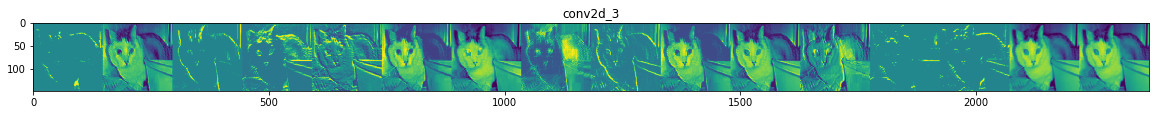

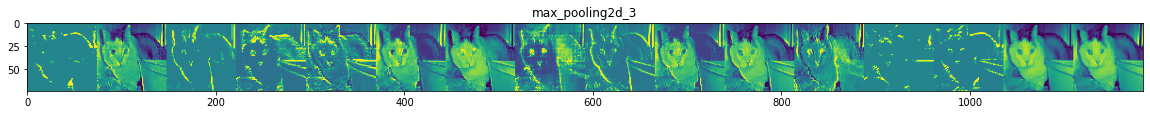

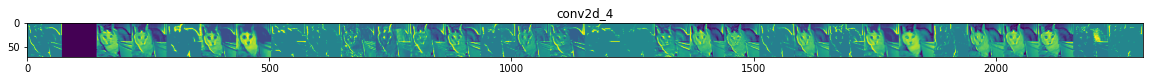

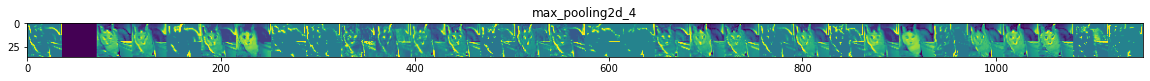

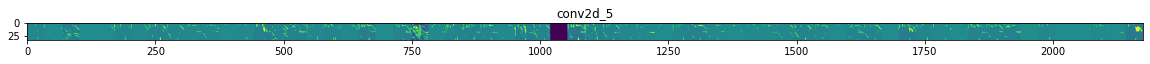

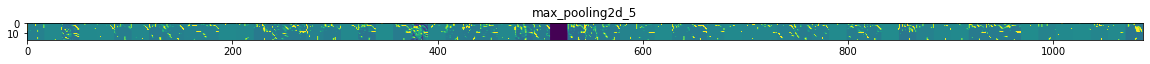

In [16]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Defino un nuevo modelo que tomará una imagen como entrada y generará
# representaciones intermedias para todas las capas en el modelo anterior 
# después de el primero.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Preparo una imagen de entrada aleatoria de un gato o un perro del conjunto de entrenamiento.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  
x = img_to_array(img)  # Numpy array con dimensión (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array con dimensión (1, 150, 150, 3)

# Rescalo por 1/255
x /= 255

# Hago correr la imagen a través de la red, obteniendo así todas
# las representaciones intermedias para esta imagen.
successive_feature_maps = visualization_model.predict(x)

# nombres de las capas
layer_names = [layer.name for layer in model.layers[1:]]

# representación
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
 
    n_features = feature_map.shape[-1]  # número de variables en feature map
    # el mapa de variables tiene una dimensión (1, size, size, n_features)
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
     
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
   
      display_grid[:, i * size : (i + 1) * size] = x
   
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


Como se puede ver, pasamos de los píxeles en bruto de las imágenes a representaciones cada vez más abstractas y compactas. Las representaciones comienzan a resaltar aquello a lo que la red presta atención, y muestran cada vez menos funciones "activadas"; la mayoría se establecen en cero. Esto se llama "escasez". La escasez de representación es una característica clave del aprendizaje profundo.

Estas representaciones llevan cada vez menos información sobre los píxeles originales de la imagen, pero cada vez más información refinada sobre la clase de la imagen. 

**Evaluación del Accuracy y Loss del modelo**

Text(0.5, 1.0, 'Training and validation loss')

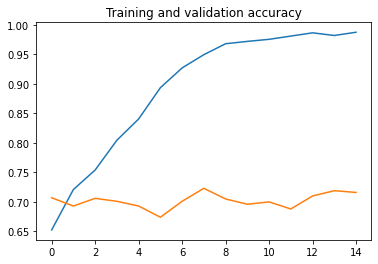

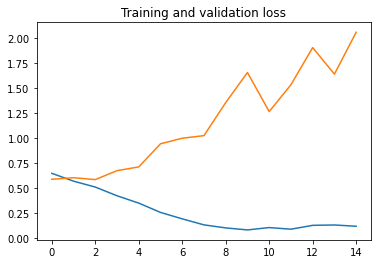

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


Como puede ver, estamos sobreajustando como si estuviera pasando de moda. Nuestra precisión de entrenamiento (en azul) se acerca al 100 % (!) mientras que nuestra precisión de validación (en naranja) se estanca en un 70 %. Nuestra pérdida de validación alcanza su mínimo después de solo cinco épocas.

Dado que tenemos un número relativamente pequeño de ejemplos de entrenamiento (2000), el sobreajuste debería ser nuestra principal preocupación. El sobreajuste ocurre cuando un modelo expuesto a muy pocos ejemplos aprende patrones que no se generalizan a nuevos datos, es decir, cuando el modelo comienza a usar características irrelevantes para hacer predicciones. 

El sobreajuste es el problema central en el aprendizaje automático: dado que estamos ajustando los parámetros de nuestro modelo a un conjunto de datos dado, ¿cómo podemos asegurarnos de que las representaciones aprendidas por el modelo serán aplicables a datos nunca antes vistos? ¿Cómo evitamos aprender cosas que son específicas de los datos de entrenamiento?

**En el siguiente ejercicio MEJORADO, veremos formas de evitar el sobreajuste en el modelo de clasificación de gatos y perros.**